# Détection de Fraude

L'objectif de ce projet est de construire un modèle qui permet de prédire la probabilité qu'une transaction soit frauduleuse.

### Importation des librairies qui seront utiles pour le traitement des données

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser

### Chargement des fichier csv contenant les données dans des dataframes

In [2]:
Fraud = pd.read_csv("Fraud_Data.csv")

In [3]:
Fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
IPAdress = pd.read_csv("IpAddress_to_Country.csv")

In [5]:
IPAdress.upper_bound_ip_address = IPAdress.upper_bound_ip_address.astype(float)

In [6]:
IPAdress.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471.0,Australia
1,16777472.0,16777727.0,China
2,16777728.0,16778239.0,China
3,16778240.0,16779263.0,Australia
4,16779264.0,16781311.0,China


- Assigner à chaque adresse IP du dataframe _Fraud_ le nom d'un pays, en comparant les adresses IP de _Fraud_ à celles de _IPAddress_
- On a donc un nouveau dataset comportant une nouvelle colonne _Country_

In [7]:
# %time Fraud['country'] = (Fraud.ip_address.apply(lambda x: IPAdress.query('lower_bound_ip_address <= @x <= upper_bound_ip_address').index.values).apply(lambda x: x[0] if len(x) else -1)).apply(lambda x: IPAdress.country[x] if x != -1 else x)

In [8]:
df = pd.read_csv('fraud_data_country.csv')

In [9]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [10]:
df.signup_time

0         2015-02-24 22:55:49
1         2015-06-07 20:39:50
2         2015-01-01 18:52:44
3         2015-04-28 21:13:25
4         2015-07-21 07:09:52
                 ...         
151107    2015-01-27 03:03:34
151108    2015-05-15 17:43:29
151109    2015-03-03 23:07:31
151110    2015-07-09 20:06:07
151111    2015-06-10 07:02:20
Name: signup_time, Length: 151112, dtype: object

## Preprocessing #1

In [11]:
df.country.value_counts().sort_values(ascending=False).head()/df.country.value_counts().sum()

United States     0.384146
unknown           0.145362
China             0.079663
Japan             0.048348
United Kingdom    0.029713
Name: country, dtype: float64

- 15% d'observations ont une valeur inconnue (unknown) dans la colonne country
- On garde ces valeurs pour en faire une catégorie
- On crée également une nouvelle colonne qui contient le temps passé sur le site (purchase_time - signup_time)

In [17]:
df.signup_time = df.signup_time.apply(lambda x: parser.parse(x))
df.purchase_time = df.purchase_time.apply(lambda x: parser.parse(x))

In [18]:
df['spend_time'] = (df.purchase_time - df.signup_time)

In [19]:
df.spend_time = df.spend_time.dt.total_seconds()

In [20]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,spend_time
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,unknown,492085.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0


In [21]:
# On élimine les colonnes signup_time et purchase_time 
df1 = df.drop(columns=['signup_time', 'purchase_time'])

In [22]:
df1.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,spend_time
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,unknown,492085.0
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0


In [23]:
df1['class'] = df1['class'].astype(object)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   purchase_value  151112 non-null  int64  
 2   device_id       151112 non-null  object 
 3   source          151112 non-null  object 
 4   browser         151112 non-null  object 
 5   sex             151112 non-null  object 
 6   age             151112 non-null  int64  
 7   ip_address      151112 non-null  float64
 8   class           151112 non-null  object 
 9   country         151112 non-null  object 
 10  spend_time      151112 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 12.7+ MB


In [25]:
df1['class'].value_counts()

0    136961
1     14151
Name: class, dtype: int64

In [26]:
df1.describe(include=[np.object])

,device_id,source,browser,sex,class,country
count,151112,151112,151112,151112,151112,151112
unique,137956,3,5,2,2,182
top,KIPFSCNUGOLDP,SEO,Chrome,M,0,United States
freq,20,60615,61432,88293,136961,58049


In [27]:
df1.describe()

,user_id,purchase_value,age,ip_address,spend_time
count,151112.000000,151112.000000,151112.000000,1.511120e+05,1.511120e+05
mean,200171.040970,36.935372,33.140704,2.152145e+09,4.932029e+06
std,115369.285024,18.322762,8.617733,1.248497e+09,3.126263e+06
min,2.000000,9.000000,18.000000,5.209350e+04,1.000000e+00
25%,100642.500000,22.000000,27.000000,1.085934e+09,2.186754e+06
50%,199958.000000,35.000000,33.000000,2.154770e+09,4.926346e+06
75%,300054.000000,49.000000,39.000000,3.243258e+09,7.644525e+06
max,400000.000000,154.000000,76.000000,4.294850e+09,1.036797e+07


## Datavisualisation

### Pourcentage de fraude dans le jeu de données

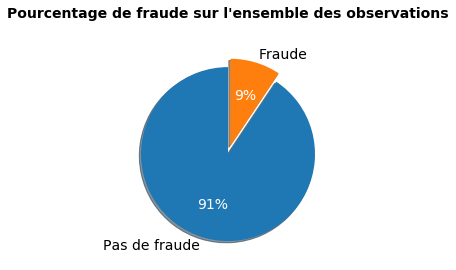

In [28]:
fig_data = df1['class'].value_counts()/df1['class'].value_counts().sum()
fig_data = fig_data.rename(index={0: 'Pas de fraude', 1: 'Fraude'})

labels = [fig_data.index[item] for item in range(0, len(fig_data.index))]
explode = (0.0,0.1)

colors = ('#22a6b3', '#badc58')
fig, ax = plt.subplots()
_, texts, autotexts = ax.pie(fig_data, autopct='%0.0f%%', shadow=True, startangle=90, explode=explode, labels=labels, radius=1.0)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size('14')

for text in texts:
    text.set_size('14')

ax.set_title("Pourcentage de fraude sur l'ensemble des observations", y=1.1, fontsize = 14, fontweight='bold')
plt.show()

- On a donc à faire un jeu de données avec un des classes déséquilibrées
- Le modèle le plus simple va donc prédire une absense de fraude dans 91% des cas. Ceci est donc le score à battre

###  Top 5 des pays où il y a le plus de fraude

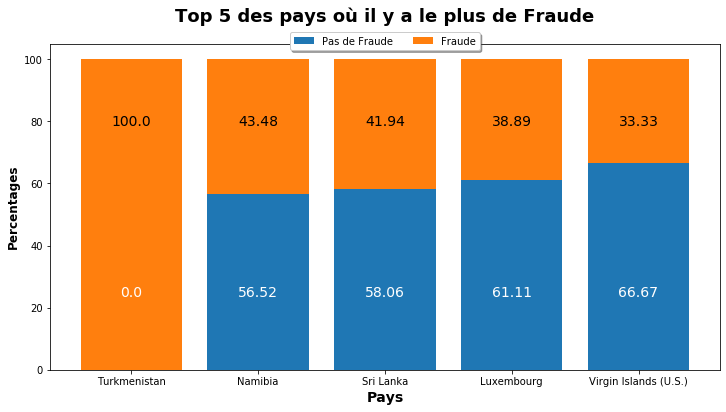

In [29]:
Fraud_trans = df1.country[df1['class']== 1].value_counts()
total_trans = df1.country.value_counts()
Fraud_prop = 100*Fraud_trans/total_trans
Top5_fraud = Fraud_prop.dropna().sort_values(ascending=False).head(5)

Top5_nofraud = np.full(5,100) - Top5_fraud
legend = Top5_fraud.index

f, ax = plt.subplots(figsize=(12,6))
ax.bar(legend, Top5_nofraud, label="Pas de Fraude")
ax.bar(legend, Top5_fraud, bottom=Top5_nofraud, label="Fraude")

for item in range(len(Top5_fraud)):
    ax.text(legend[item], 80, np.round(Top5_fraud[item],2), size=14, ha="center", va="center")
    ax.text(legend[item], 25, np.round(Top5_nofraud[item],2), size=14, ha="center", va="center", color='white')

plt.xlabel('Pays', fontsize=14, fontweight='bold')
plt.ylabel('Percentages', fontsize=12, fontweight='bold')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True, shadow=True)

ax.set_title("Top 5 des pays où il y a le plus de Fraude", y=1.05, fontsize=18, fontweight='bold')

plt.show()

In [30]:
data = df1['country'].value_counts()
data['Turkmenistan'], data['Namibia'], data['Sri Lanka'], data['Luxembourg'], data['Virgin Islands (U.S.)']

(1, 23, 31, 72, 3)

In [31]:
df1[(df1['country'] == 'Turkmenistan') | (df1['country'] == 'Namibia') | (df1['country'] == 'Sri Lanka') | (df1['country'] == 'Luxembourg')]

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,spend_time
1525,385459,40,RWUHPSTNRTRXF,Direct,Safari,F,26,1.776844e+09,0,Namibia,4714747.0
2420,138998,37,RSEQYZOIJLVPL,SEO,FireFox,F,29,1.583788e+09,1,Turkmenistan,2756012.0
5133,112640,40,QMRKLXXQOTPFC,SEO,Chrome,M,18,3.238628e+09,0,Luxembourg,1574810.0
7091,233340,44,SNMNYNADOQIEC,Direct,FireFox,M,20,2.463902e+09,0,Luxembourg,6860508.0
7124,181050,38,MIMQEYLSYIXRD,Ads,FireFox,F,24,2.083243e+09,1,Sri Lanka,1.0
...,...,...,...,...,...,...,...,...,...,...,...
145300,267612,14,WRTKFZMFEGZLY,Ads,Chrome,F,29,2.449679e+09,1,Luxembourg,1.0
145802,193619,33,TIJYSWEOKLNRN,Ads,FireFox,F,28,2.470692e+09,0,Luxembourg,1844286.0
146734,20704,38,MIMQEYLSYIXRD,Ads,FireFox,F,24,2.083243e+09,1,Sri Lanka,1.0
147700,103880,56,NAVTSIVNWJCJJ,Direct,Chrome,F,55,1.399000e+09,0,Luxembourg,3753953.0


In [32]:
df1[(df1['spend_time'] == 1.0)]['class'].value_counts()

1    7600
Name: class, dtype: int64

- Le Turkménistan a 100% de fraude, toutefois il faut noter qu'il n'existe qu'une seule transaction pour ce pays
- Il faut également noter que le nombre de transactions dans les 5 pays ayant le plus de cas de fraude est très faible (< 100)
- Dans 100% des cas il y a fraude lorsque le temps de la transaction est de 1s

###  Pourcentage de fraude selon la source

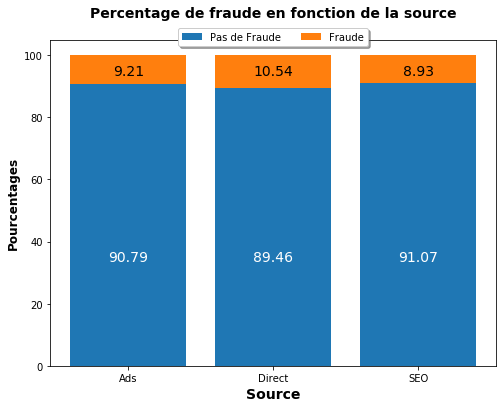

In [33]:
Source_fraud = 100*df1.source[df1['class']== 1].value_counts()/df1.source.value_counts()
Source_nofraud = np.full(3,100) - Source_fraud
legend = Source_fraud.index

f, ax = plt.subplots(figsize=(8,6))
ax.bar(legend, Source_nofraud, label="Pas de Fraude")
ax.bar(legend, Source_fraud, bottom=Source_nofraud, label="Fraude")

for item in range(len(Source_fraud)):
    ax.text(legend[item], 95, np.round(Source_fraud[item],2), size=14, ha="center", va="center")
    ax.text(legend[item], 35, np.round(Source_nofraud[item],2), size=14, ha="center", va="center", color='white')

plt.xlabel('Source', fontsize=14, fontweight='bold')
plt.ylabel('Pourcentages', fontsize=12, fontweight='bold')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True, shadow=True)
    
ax.set_title("Percentage de fraude en fonction de la source", y=1.05, fontsize=14, fontweight='bold')
plt.show()

In [34]:
df1['source'].value_counts()

SEO       60615
Ads       59881
Direct    30616
Name: source, dtype: int64

- Les utilisateurs arrivent sur le site web par 3 canaux, donc 2 (SEO et Ads) représentent le double du traffic du 3e (Direct)
- Il ne semble toutefois pas avoir d'influence notable du canal sur le taux de fraude

###  Pourcentage de fraude selon le navigateur web utilisé pour transaction

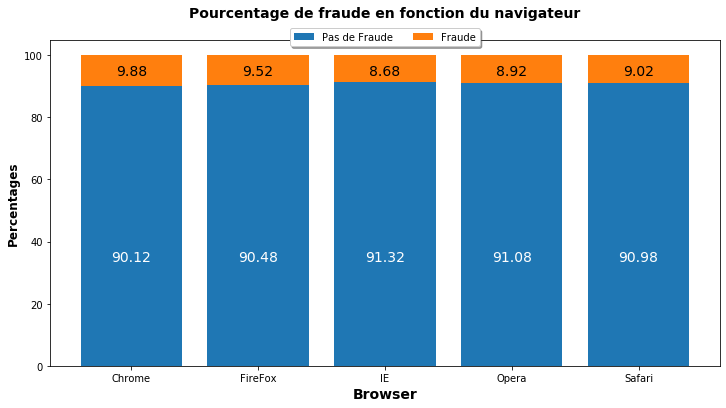

In [35]:
Browser_fraud = 100*df1.browser[df1['class']== 1].value_counts()/df1.browser.value_counts()
Browser_nofraud = np.full(5,100) - Browser_fraud
legend = Browser_fraud.index

f, ax = plt.subplots(figsize=(12,6))
ax.bar(legend, Browser_nofraud, label="Pas de Fraude")
ax.bar(legend, Browser_fraud, bottom=Browser_nofraud, label="Fraude")

for item in range(len(Browser_fraud)):
    ax.text(legend[item], 95, np.round(Browser_fraud[item],2), size=14, ha="center", va="center")
    ax.text(legend[item], 35, np.round(Browser_nofraud[item],2), size=14, ha="center", va="center", color='white')

plt.xlabel('Browser', fontsize=14, fontweight='bold')
plt.ylabel('Percentages', fontsize=12, fontweight='bold')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True, shadow=True)
    
ax.set_title("Pourcentage de fraude en fonction du navigateur", y=1.05, fontsize=14, fontweight='bold')
plt.show()

In [36]:
df1['browser'].value_counts()

Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: browser, dtype: int64

- La plupart des transactions sont effectuées avec le navigateur chrome
- Toutefois le navigateur employé n'a pas d'influence notable sur le taux de fraude

###  Pourcentage de fraude selon le genre de l'utilisateur

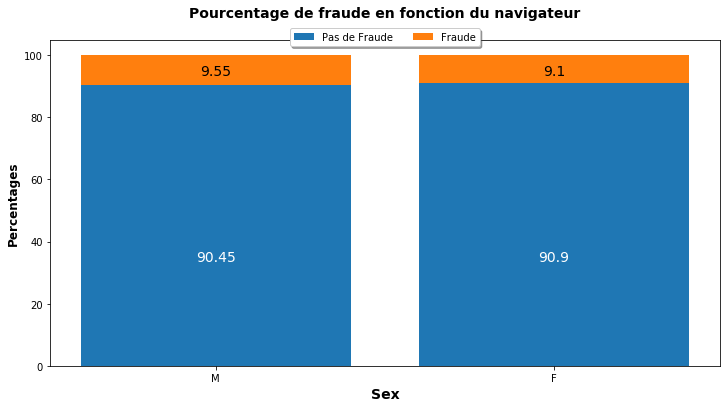

In [37]:
Gender_fraud = 100*df1.sex[df1['class']== 1].value_counts()/df1.sex.value_counts()
Gender_nofraud = np.full(2,100) - Gender_fraud
legend = Gender_fraud.index

f, ax = plt.subplots(figsize=(12,6))
ax.bar(legend, Gender_nofraud, label="Pas de Fraude")
ax.bar(legend, Gender_fraud, bottom=Gender_nofraud, label="Fraude")

for item in range(len(Gender_fraud)):
    ax.text(legend[item], 95, np.round(Gender_fraud[item],2), size=14, ha="center", va="center")
    ax.text(legend[item], 35, np.round(Gender_nofraud[item],2), size=14, ha="center", va="center", color='white')

plt.xlabel('Sex', fontsize=14, fontweight='bold')
plt.ylabel('Percentages', fontsize=12, fontweight='bold')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True, shadow=True)
    
ax.set_title("Pourcentage de fraude en fonction du navigateur", y=1.05, fontsize=14, fontweight='bold')
plt.show()

- Le genre de l'utilisateur ne détermine pas la nature de la transaction

### Pourcentage de fraude selon le montant de la transaction

In [38]:
df1.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,spend_time
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,unknown,492085.0
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0


In [39]:
df1.purchase_value.max(), df1.purchase_value.min()

(154, 9)

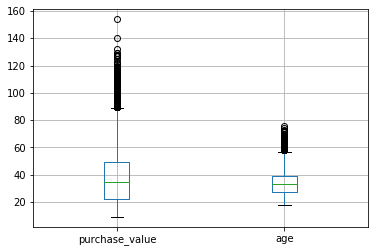

In [40]:
df1.boxplot(column=['purchase_value', 'age'])

In [41]:
df1.purchase_value.min(), df1.purchase_value.median(), df1.purchase_value.mean(), df1.purchase_value.max()

(9, 35.0, 36.93537243898565, 154)

In [42]:
df1[df1['purchase_value'] <= 35]['class'].value_counts(normalize=True)

0    0.906706
1    0.093294
Name: class, dtype: float64

In [43]:
df1[df1['purchase_value'] > 35]['class'].value_counts(normalize=True)

0    0.905975
1    0.094025
Name: class, dtype: float64

- Les transactions sont comprises entre 9€ et 154€
- 50% des transactions sont < 35€ et 50% > à ce montant
- Le taux de fraude pour les deux catégories de transaction est d'environ 9%

In [44]:
df1.age.min(), df1.age.median(), df1.age.mean(), df1.age.max()

(18, 33.0, 33.14070358409656, 76)

In [45]:
df1[df1['age'] <= 33]['class'].value_counts(normalize=True)

0    0.907889
1    0.092111
Name: class, dtype: float64

In [46]:
df1[df1['age'] >= 33]['class'].value_counts(normalize=True)

0    0.904264
1    0.095736
Name: class, dtype: float64

- Les utilisateurs sont agés de 18 à 76 ans
- 50% des utilisateurs sont agés de moins de 33 ans et 50% de plus de 33 ans
- Le taux de fraude pour ces deux tranches d'âge se situe autour de 9%

## Preprocessing #2

In [47]:
df1.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,spend_time
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,unknown,492085.0
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0


#### Dans un premier temps on utilise toutes les variables du jeu de données pour créer un modèle

- On sépare les variables explicatives et la variable cible

In [48]:
Y = df1.loc[:, 'class']
X = df1.loc[:, ['purchase_value', 'source', 'browser', 'sex', 'age', 'ip_address', 'spend_time']]
X = pd.get_dummies(X, drop_first=True)

- On crée les données d'entrainement et de test
- Stratify = Y pour répartir les classes 0 et 1 de façon équilibrée dans les jeux de train et de test

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [50]:
Y_test = Y_test.astype('int64')
Y_train = Y_train.astype('int64')

In [51]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

In [52]:
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

## Modèle de régression logistique

- class_weight = balanced pour pénaliser les erreurs sur la classe sous représentée afin d'améliorer les prédictions

In [64]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
from sklearn.metrics import confusion_matrix, classification_report
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)

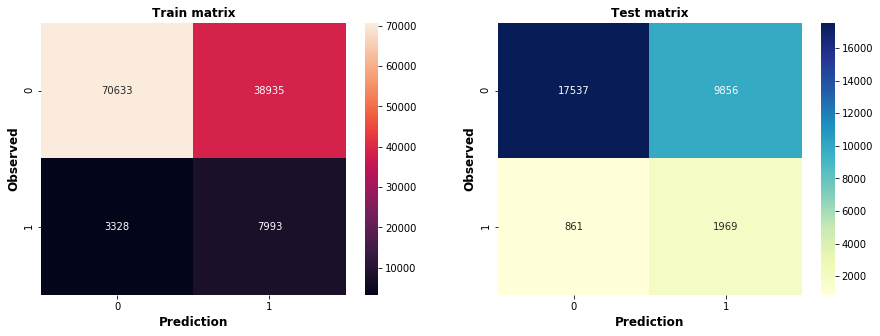

In [66]:
fig, axes = plt.subplots(ncols=2, figsize=(15,5))
ax1, ax2 = axes

train_matrix = confusion_matrix(Y_train, Y_train_pred)
test_matrix = confusion_matrix(Y_test, Y_test_pred)

sns.heatmap(train_matrix, annot=True, ax=ax1, fmt='d')
ax1.set_xlabel('Prediction', fontsize=12, fontweight='bold')
ax1.set_ylabel('Observed', fontsize=12, fontweight='bold')
ax1.set_title('Train matrix', fontsize=12, fontweight='bold')

sns.heatmap(test_matrix, annot=True, ax=ax2, fmt='d', cmap="YlGnBu")
ax2.set_xlabel('Prediction', fontsize=12, fontweight='bold')
ax2.set_ylabel('Observed', fontsize=12, fontweight='bold')
ax2.set_title('Test matrix', fontsize=12, fontweight='bold')

plt.show()

In [67]:
print(classification_report(Y_train, Y_train_pred)), print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.64      0.77    109568
           1       0.17      0.71      0.27     11321

    accuracy                           0.65    120889
   macro avg       0.56      0.68      0.52    120889
weighted avg       0.88      0.65      0.72    120889

              precision    recall  f1-score   support

           0       0.95      0.64      0.77     27393
           1       0.17      0.70      0.27      2830

    accuracy                           0.65     30223
   macro avg       0.56      0.67      0.52     30223
weighted avg       0.88      0.65      0.72     30223



(None, None)

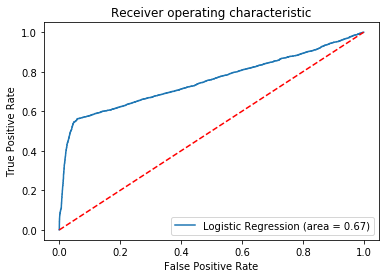

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, Y_test_pred)
fpr, tpr, thresholds = roc_curve(Y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

- On dénombre 861 FN sur le test: Dans les cas de fraude, il est important de minimiser le nombre de FN
- Le modèle prédit correctement les transactions frauduleuses dans 17% des cas, et les transactions non frauduleuses dans 95% des cas (précision)
- Le modèle n'arrive à détecter que 70% des fraudes, il est donc perfectible (recall)

## Optimisation du modèle de régression logistique

- On va dans un premier temps optimiser l'hyperparamètre C du modèle initial pour essayer de l'améliorer
- On utilise donc une Gridsearch et une cross validation avec 10 sous échantillons

In [69]:
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(class_weight='balanced')
params = {'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]}
grid =  GridSearchCV(clf, param_grid=params, cv = 10)
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
grid.best_params_

{'C': 0.09}

In [71]:
grid.score(X_test, Y_test)

0.6454025080236906

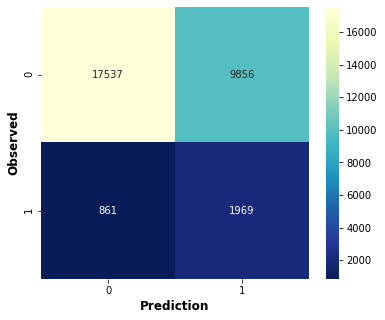

In [72]:
Y_pred = grid.predict(X_test)

test_matrix = confusion_matrix(Y_test, Y_pred)
f, ax = plt.subplots(figsize=(6,5))

sns.heatmap(test_matrix, annot=True, fmt='d', ax=ax, cmap="YlGnBu_r")

plt.xlabel('Prediction', fontsize=12, fontweight='bold')
plt.ylabel('Observed', fontsize=12, fontweight='bold')
plt.show()

- Le modèle obtenu n'est pas meilleur que le précédent

## Feature engineering

- On crée un nouveau jeu de données avec une colonne continent, créée à partir de la colonne country

In [73]:
continent_info = pd.read_csv('fraud_dataset_cont.csv')

In [74]:
continent_info.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,country,time_delta,class,Continents
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,Japan,1251.8561,0,Asia
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,USA,4.9844,0,North America
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,USA,0.0003,1,North America
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,-1,136.6903,0,-1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,USA,1211.5169,0,North America


In [75]:
df2 = pd.concat([df1, continent_info.Continents], axis=1)
df2 = df2.rename(columns={'Continents': 'continent'})
df2.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,spend_time,continent
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0,Asia
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0,North America
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0,North America
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,unknown,492085.0,-1
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0,North America


- Etant donné que le taux de fraude varie en fonction du pays on va créer une colonne qui va contenir le taux de fraude (ou de non fraude, mais pas les 2)

In [76]:
df2['country_fraudrate'] = pd.DataFrame(Fraud_prop.tolist())

In [77]:
df2.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,spend_time,continent,country_fraudrate
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0,Asia,16.666667
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0,North America,NaN
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0,North America,10.655738
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,unknown,492085.0,-1,4.166667
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0,North America,NaN


In [78]:
df2.country_fraudrate = df2.country_fraudrate.apply(lambda x: x if x==x else 0)

In [79]:
df2.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,spend_time,continent,country_fraudrate
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0,Asia,16.666667
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0,North America,0.000000
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0,North America,10.655738
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,unknown,492085.0,-1,4.166667
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0,North America,0.000000


In [80]:
df2.continent = df2.continent.apply(lambda x: 'unknown' if x=='-1' else x)

In [81]:
df2.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,spend_time,continent,country_fraudrate
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0,Asia,16.666667
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0,North America,0.000000
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0,North America,10.655738
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,unknown,492085.0,unknown,4.166667
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0,North America,0.000000


- On convertit la colonne 'spend_time' en heures

In [82]:
df2.spend_time = (df2.spend_time/3600)

In [83]:
df2.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,spend_time,continent,country_fraudrate
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1251.856111,Asia,16.666667
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,4.984444,North America,0.000000
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0.000278,North America,10.655738
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,unknown,136.690278,unknown,4.166667
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1211.516944,North America,0.000000


- On crée une colonne 'freq_device_id' qui contient le nombre d'occurences d'une valeur donnée dans la colonne device_id 

In [84]:
df2['freq_device_id'] = df2.groupby('device_id')['user_id'].transform('count')

In [85]:
df2.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,spend_time,continent,country_fraudrate,freq_device_id
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1251.856111,Asia,16.666667,1
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,4.984444,North America,0.000000,1
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0.000278,North America,10.655738,12
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,unknown,136.690278,unknown,4.166667,1
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1211.516944,North America,0.000000,1


- On regarde les boites à moustaches des colonnes contenant des variables continues susceptibles d'être transformées en varibales discrètes ou en classes

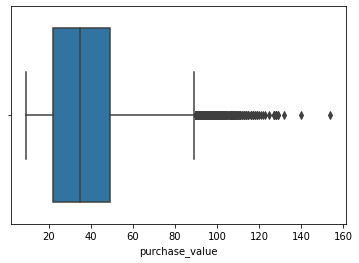

In [86]:
sns.boxplot(df2.purchase_value)

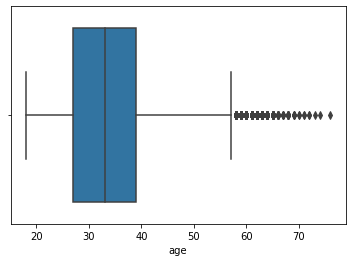

In [87]:
sns.boxplot(df2.age)

In [88]:
df2.age = df2.age.apply(lambda x: '35Lower' if x <= 35
                             else '50Lower' if 35<x<=50
                             else '50Higher')

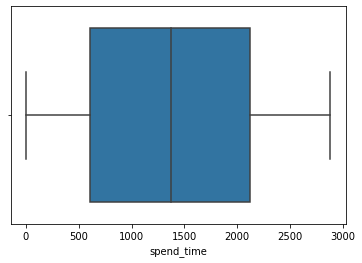

In [89]:
sns.boxplot(df2.spend_time)

In [90]:
df2.spend_time = df2.spend_time.apply(lambda x: 'Hours' if x < 24
                                            else 'Days' if 24 <= x < 168
                                           else 'Weeks' if 168 <= x < 672
                                           else 'Months')

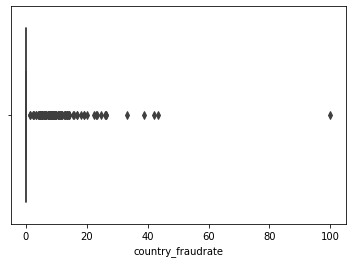

In [91]:
sns.boxplot(df2.country_fraudrate)

In [92]:
df2.country_fraudrate = df2.country_fraudrate.apply(lambda x: 'Low' if x < 10 
                                                         else 'High')

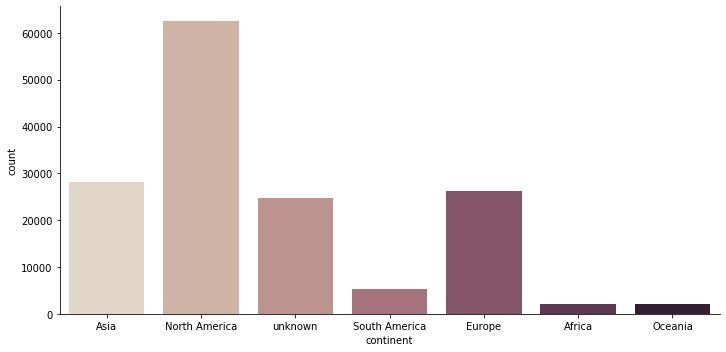

In [93]:
sns.catplot(x="continent", kind="count", palette="ch:.25", data=df2, height=5, aspect=2)

In [94]:
df2.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,spend_time,continent,country_fraudrate,freq_device_id
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,50Lower,7.327584e+08,0,Japan,Months,Asia,High,1
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,50Higher,3.503114e+08,0,United States,Hours,North America,Low,1
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,50Higher,2.621474e+09,1,United States,Hours,North America,High,12
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,50Lower,3.840542e+09,0,unknown,Days,unknown,Low,1
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,50Lower,4.155831e+08,0,United States,Months,North America,Low,1


## Nouveau modèle de Régression logistique avec les nouvelles variables

In [95]:
X = df2.loc[:,['purchase_value', 'source', 'browser', 'sex', 'age', 'spend_time', 'continent', 'country_fraudrate', 'freq_device_id']]
Y = df2['class']

In [96]:
X = pd.get_dummies(X)

In [97]:
Y = Y.astype('int64')

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25, random_state=42)

In [99]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [100]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

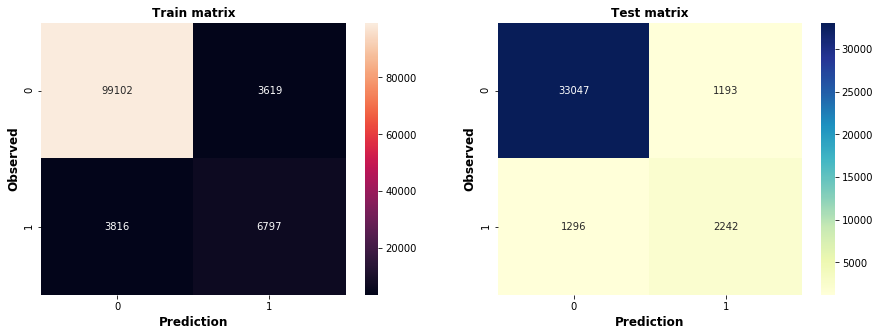

In [101]:
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)

fig, axes = plt.subplots(ncols=2, figsize=(15,5))
ax1, ax2 = axes

train_matrix = confusion_matrix(Y_train, Y_train_pred)
test_matrix = confusion_matrix(Y_test, Y_test_pred)

sns.heatmap(train_matrix, annot=True, ax=ax1, fmt='d')
ax1.set_xlabel('Prediction', fontsize=12, fontweight='bold')
ax1.set_ylabel('Observed', fontsize=12, fontweight='bold')
ax1.set_title('Train matrix', fontsize=12, fontweight='bold')

sns.heatmap(test_matrix, annot=True, ax=ax2, fmt='d', cmap="YlGnBu")
ax2.set_xlabel('Prediction', fontsize=12, fontweight='bold')
ax2.set_ylabel('Observed', fontsize=12, fontweight='bold')
ax2.set_title('Test matrix', fontsize=12, fontweight='bold')

plt.show()

In [105]:
print(classification_report(Y_train, Y_train_pred)), print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96    102721
           1       0.65      0.64      0.65     10613

    accuracy                           0.93    113334
   macro avg       0.81      0.80      0.81    113334
weighted avg       0.93      0.93      0.93    113334

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     34240
           1       0.65      0.63      0.64      3538

    accuracy                           0.93     37778
   macro avg       0.81      0.80      0.80     37778
weighted avg       0.93      0.93      0.93     37778



(None, None)

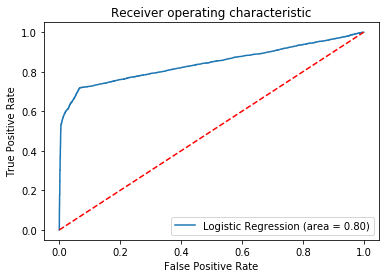

In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, Y_test_pred)
fpr, tpr, thresholds = roc_curve(Y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

- On fait mieux que le modèle précédent au niveau du score mais le nombre de FN a augmenté
- On va essayer de réduie le nombre de FN

## Gridsearch pour optimiser la valeur de C

In [107]:
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(class_weight='balanced')
params = {'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]}
grid =  GridSearchCV(clf, param_grid=params, cv = 10)
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [108]:
grid.best_params_

{'C': 0.009}

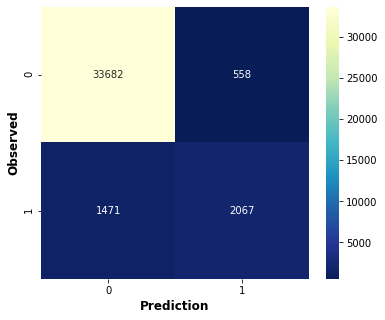

In [109]:
Y_pred = grid.predict(X_test)

test_matrix = confusion_matrix(Y_test, Y_pred)
f, ax = plt.subplots(figsize=(6,5))

sns.heatmap(test_matrix, annot=True, fmt='d', ax=ax, cmap="YlGnBu_r")

plt.xlabel('Prediction', fontsize=12, fontweight='bold')
plt.ylabel('Observed', fontsize=12, fontweight='bold')
plt.show()

In [110]:
grid.score(X_test, Y_test)

0.9462914924029858

In [111]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     34240
           1       0.79      0.58      0.67      3538

    accuracy                           0.95     37778
   macro avg       0.87      0.78      0.82     37778
weighted avg       0.94      0.95      0.94     37778



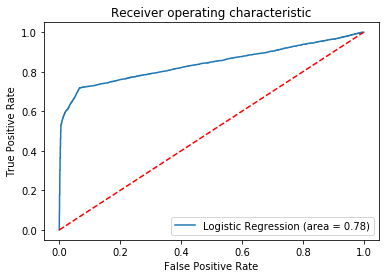

In [112]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, Y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, grid.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

- Avec la GridSearch on a un meilleur score qu'avec le modèle initial, mais le nombre de FN est toujours élevé
- On va tenter de le réduire en utilisant un arbre de Décision et une GridSearch

## Arbre de désicion et Gridsearch

In [113]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(class_weight='balanced')
params = {'criterion':['gini', 'entropy'],
          'max_depth': np.arange(1,10),
          'min_samples_leaf': [1, 5, 10, 20]
         }
grid =  GridSearchCV(tree, param_grid=params, cv = 10)
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={

In [114]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}

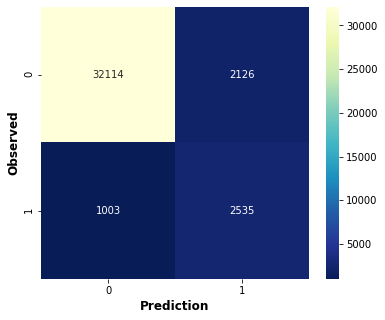

In [115]:
Y_pred = grid.predict(X_test)

test_matrix = confusion_matrix(Y_test, Y_pred)
f, ax = plt.subplots(figsize=(6,5))

sns.heatmap(test_matrix, annot=True, fmt='d', ax=ax, cmap="YlGnBu_r")

plt.xlabel('Prediction', fontsize=12, fontweight='bold')
plt.ylabel('Observed', fontsize=12, fontweight='bold')
plt.show()

In [116]:
grid.score(X_test, Y_test)

0.9171740166234317

In [117]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     34240
           1       0.54      0.72      0.62      3538

    accuracy                           0.92     37778
   macro avg       0.76      0.83      0.79     37778
weighted avg       0.93      0.92      0.92     37778



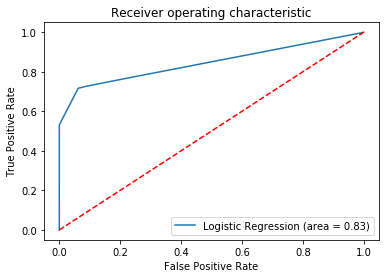

In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, Y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, grid.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

- On a un meilleur score, mais un nombre de faux négatifs en baisse
- Essayons de faire encore mieux

## Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(class_weight='balanced')
params = {'n_estimators': range(20, 50),
          'max_depth': np.arange(1,10)}
grid = GridSearchCV(rf_clf, param_grid=params)
grid.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                          

In [120]:
grid.best_params_

{'max_depth': 2, 'n_estimators': 21}

In [121]:
grid.score(X_test, Y_test)

0.908306421726931

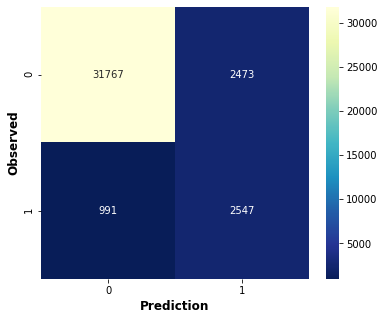

In [122]:
Y_pred = grid.predict(X_test)

test_matrix = confusion_matrix(Y_test, Y_pred)
f, ax = plt.subplots(figsize=(6,5))

sns.heatmap(test_matrix, annot=True, fmt='d', ax=ax, cmap="YlGnBu_r")

plt.xlabel('Prediction', fontsize=12, fontweight='bold')
plt.ylabel('Observed', fontsize=12, fontweight='bold')
plt.show()

In [123]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     34240
           1       0.51      0.72      0.60      3538

    accuracy                           0.91     37778
   macro avg       0.74      0.82      0.77     37778
weighted avg       0.93      0.91      0.92     37778



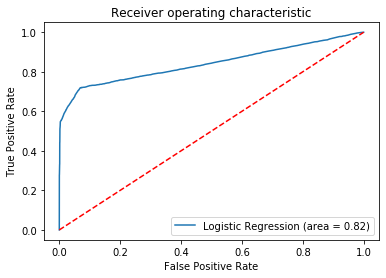

In [124]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, Y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, grid.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

- On a réduit le nombre de faux négatifs (991), essayons de faire encore mieux

### Modèle AdaBoost avec un arbre de décision et les hyperparamètres optimisés

In [125]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3, min_samples_leaf=1)
clf_ada = AdaBoostClassifier(tree)
clf_ada.fit(X_train, Y_train)
clf_ada.score(X_test, Y_test)

0.9158769654296152

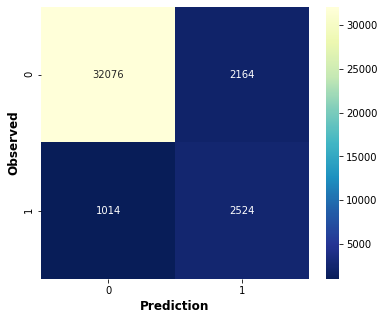

In [126]:
Y_pred = clf_ada.predict(X_test)

test_matrix = confusion_matrix(Y_test, Y_pred)
f, ax = plt.subplots(figsize=(6,5))

sns.heatmap(test_matrix, annot=True, fmt='d', ax=ax, cmap="YlGnBu_r")

plt.xlabel('Prediction', fontsize=12, fontweight='bold')
plt.ylabel('Observed', fontsize=12, fontweight='bold')
plt.show()

In [130]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     34240
           1       0.54      0.71      0.61      3538

    accuracy                           0.92     37778
   macro avg       0.75      0.83      0.78     37778
weighted avg       0.93      0.92      0.92     37778



In [129]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3, min_samples_leaf=1)
clf_ada = AdaBoostClassifier(tree)
parameters = {'n_estimators':[40, 50, 70, 100, 150, 200],
              "learning_rate":[1.0, 0.9, 0.8, 0.7, 0.6, 0.5]}

clf_ada_best = GridSearchCV(clf_ada, parameters)
clf_ada_best.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight='balanced',
                                                                                criterion='gini',
                                                                                max_depth=3,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_lea

In [131]:
clf_ada_best.score(X_test, Y_test)

0.9167240192704749

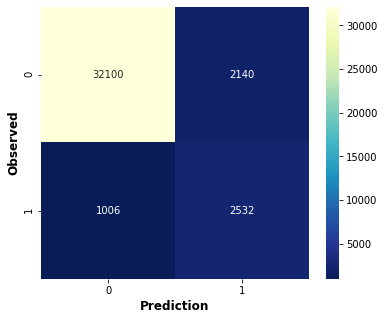

In [132]:
Y_pred = clf_ada_best.predict(X_test)

test_matrix = confusion_matrix(Y_test, Y_pred)
f, ax = plt.subplots(figsize=(6,5))

sns.heatmap(test_matrix, annot=True, fmt='d', ax=ax, cmap="YlGnBu_r")

plt.xlabel('Prediction', fontsize=12, fontweight='bold')
plt.ylabel('Observed', fontsize=12, fontweight='bold')
plt.show()

- Le modèle est un peu meilleur, avec quelques faux négatifs en moins

### Modèle XgBoost avec un arbre de décision et les hyperparamètres optimisés

In [356]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [135]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
clf_xgb = XGBClassifier(objective="binary:logistic")
parameters = {'n_estimators': [40, 50, 70, 100, 150, 200],
              'learning_rate': [1.0, 0.9, 0.8, 0.7, 0.6, 0.5], 
              'max_depth': np.arange(1,10)}

clf_xgb_best = GridSearchCV(clf_xgb, parameters)
clf_xgb_best.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=None,
           

In [137]:
clf_xgb_best.score(X_test, Y_test)

0.9559532002752925

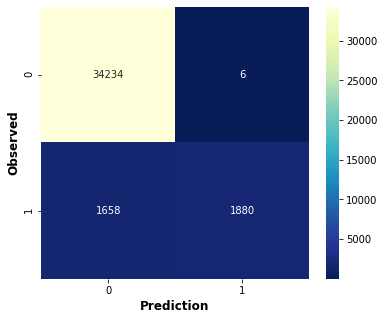

In [138]:
Y_pred = clf_xgb_best.predict(X_test)

test_matrix = confusion_matrix(Y_test, Y_pred)
f, ax = plt.subplots(figsize=(6,5))

sns.heatmap(test_matrix, annot=True, fmt='d', ax=ax, cmap="YlGnBu_r")

plt.xlabel('Prediction', fontsize=12, fontweight='bold')
plt.ylabel('Observed', fontsize=12, fontweight='bold')
plt.show()

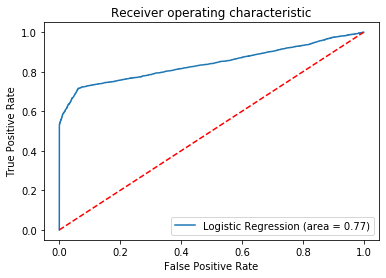

In [139]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, Y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, clf_xgb_best.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

- On fait moins bien qu'avec le modèle AdaBoost, aussi bien au niveau du score que du nombre de faux négatifs
- Le meilleur modèle obtenu est celui avec AdaBoost (score de 0.92 et "seulement" 1006 FN prédits)
- Pour l'améliorer il faudrait peut être utiliser des techniques de resampling pour se concentrer davantage sur la classe la moins représentée